# Quality factor

In RS propagation, the algorithm provides information about the quality in the simulation, as described in       F. Shen and A. Wang, “Fast-Fourier-transform based numerical integration method for the Rayleigh-Sommerfeld diffraction formula,” Appl. Opt., vol. 45, no. 6, pp. 1102–1110, 2006.

In [1]:
%load_ext autoreload
%autoreload 2

## XY Scheme

In [2]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

from diffractio.scalar_fields_XY import get_RS_minimum_z, quality_factor

In [3]:
wavelength = 0.5 * um
num_x = 512
num_y = 512
range_x=1*mm
range_y=1*mm
x0 = np.linspace(-range_x / 2, range_x / 2, num_x)
y0 = np.linspace(-range_y / 2, range_y / 2, num_y)


To check the minimum z distance where the quality is good we have the get_RS_minimum_z function.

In [4]:
z_min = get_RS_minimum_z(range_x,
                         range_y,
                         num_x,
                         num_y,
                         wavelength,
                         n=1,
                         quality=1,
                         verbose=True)


z min = 3845.47


In [5]:
quality = quality_factor(range_x,
                         range_y,
                         num_x,
                         num_y,
                         z_min,
                         wavelength,
                         n=1,
                         verbose=True)


Quality factor = 1.05


Let us check that the simulation is OK

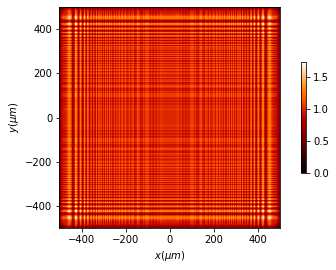

In [6]:
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0.square(r0=(0,0), size=range_x)
u2 = t0.RS(z=z_min, new_field=True, verbose=True)
u2.draw(has_colorbar='vertical')
plt.clim(vmin=0)

Function *get_RS_minimum_z* is also available inside the class:

In [7]:
z_min = t0.get_RS_minimum_z(verbose=True)

z min = 3.85 mm


Now, let us reduce the distance, to see if the simulation si working worse.

- Needs denser sampling: factor 0.90



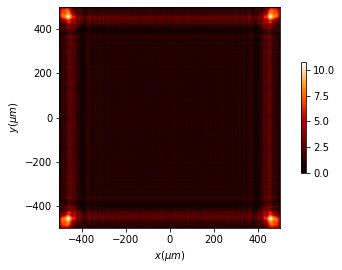

In [8]:
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0.square(r0=(0, 0), size=range_x)
u2 = t0.RS(z=0.9*z_min, new_field=True, verbose=True)
u2.draw(has_colorbar='vertical')
plt.clim(vmin=0)

The quality factor is computed considering the total area. When the mask is smaller that the whole area, good results can be obtained even with quality<1.

- Needs denser sampling: factor 0.76



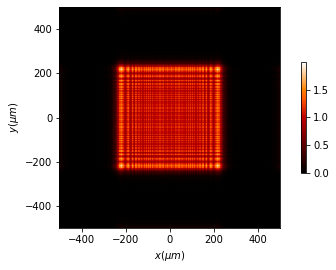

In [10]:
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0.square(r0=(0, 0), size=range_x/2)
u2 = t0.RS(z=0.75 * z_min, new_field=True, verbose=True)
u2.draw(has_colorbar='vertical')
plt.clim(vmin=0)

But eventually, it starts to work badly:

- Needs denser sampling: factor 0.67



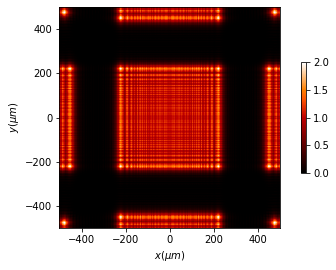

In [11]:
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0.square(r0=(0, 0), size=range_x / 2)
u2 = t0.RS(z=0.66 * z_min, new_field=True, verbose=True)
u2.draw(has_colorbar='vertical')
plt.clim(vmin=0)

### Distance in terms of the number of data

In [13]:
wavelength = 0.5 * um
range_x=1*mm
range_y=1*mm

num_data=np.linspace(32,3000)
zs = np.zeros_like(num_data)

In [14]:
for i, data in enumerate(num_data):
    z_min = get_RS_minimum_z(range_x,
                             range_y,
                             data,
                             data,
                             wavelength,
                             n=1,
                             quality=1,
                             verbose=False)
    zs[i]=z_min


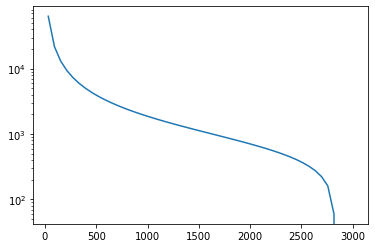

In [15]:
plt.semilogy(num_data, zs)


## X Scheme

The quality factor is also implemented in the X scheme

In [76]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.scalar_fields_X import get_RS_minimum_z, quality_factor

In [94]:
wavelength = .5 * um
num_x = 512
range_x = 1 * mm
x0 = np.linspace(-range_x / 2, range_x / 2, num_x)


In [95]:
z_min = get_RS_minimum_z(range_x,
                         num_x,
                         wavelength,
                         n=1,
                         quality=1,
                         verbose=True)


z min = 3779.77


In [106]:
t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info='t0')
t0.slit(x0=0, size=0.85*mm)


In [107]:
z_min = t0.get_RS_minimum_z()

z min = 3.78 mm


- Needs denser sampling: factor 0.97


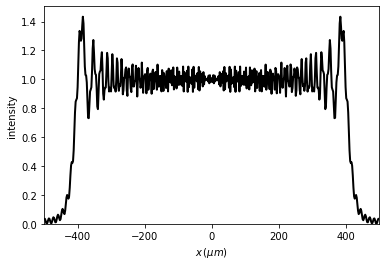

In [108]:
u2 = t0.RS(z=z_min, new_field=True,  verbose=True)
u2.draw()


- Needs denser sampling: factor 0.88


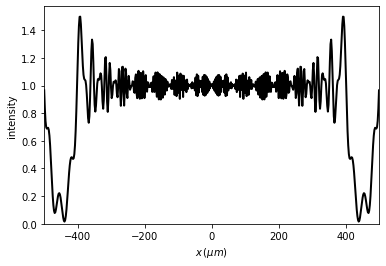

In [109]:
u2 = t0.RS(z=0.9*z_min, new_field=True, verbose=True)
u2.draw()